In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
sns.set()


In [24]:
from google.colab import drive
drive.mount("/content/drive")

data = pd.read_csv("/content/drive/My Drive/dataset/kredit.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data

,id_pelanggan,usia,jk,pendapatan,jmlh_kartu_kredit,pengeluaran,respon
0,1,40,P,72000000,3,6000000,1
1,2,28,P,36000000,1,4500000,0
2,3,31,L,60000000,2,5000000,0
3,4,28,P,36000000,1,3000000,1
4,5,38,L,72000000,2,5000000,1
5,6,28,P,58000000,2,6200000,1
6,7,40,L,36000000,1,4000000,0
7,8,38,P,72000000,4,10000000,1
8,9,31,L,70000000,3,8000000,0
9,10,41,P,60000000,1,5300000,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_pelanggan       31 non-null     int64 
 1   usia               31 non-null     int64 
 2   jk                 31 non-null     object
 3   pendapatan         31 non-null     int64 
 4   jmlh_kartu_kredit  31 non-null     int64 
 5   pengeluaran        31 non-null     int64 
 6   respon             31 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.8+ KB


In [27]:
data.describe()

,id_pelanggan,usia,pendapatan,jmlh_kartu_kredit,pengeluaran,respon
count,31.000000,31.000000,3.100000e+01,31.000000,3.100000e+01,31.000000
mean,16.000000,34.354839,5.506452e+07,1.903226,5.903226e+06,0.516129
std,9.092121,5.588968,1.364047e+07,0.943569,2.263402e+06,0.508001
min,1.000000,24.000000,3.600000e+07,1.000000,3.000000e+06,0.000000
25%,8.500000,29.500000,4.200000e+07,1.000000,4.500000e+06,0.000000
50%,16.000000,36.000000,5.800000e+07,2.000000,5.000000e+06,1.000000
75%,23.500000,40.000000,6.650000e+07,2.500000,7.100000e+06,1.000000
max,31.000000,44.000000,7.200000e+07,4.000000,1.200000e+07,1.000000


In [28]:
data.isna().sum()

id_pelanggan         0
usia                 0
jk                   0
pendapatan           0
jmlh_kartu_kredit    0
pengeluaran          0
respon               0
dtype: int64

In [29]:
data['jk'].value_counts()

P    17
L    14
Name: jk, dtype: int64

In [30]:
data['respon'].value_counts()

1    16
0    15
Name: respon, dtype: int64

In [31]:
data.dtypes

id_pelanggan          int64
usia                  int64
jk                   object
pendapatan            int64
jmlh_kartu_kredit     int64
pengeluaran           int64
respon                int64
dtype: object

In [32]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, data[col].unique())

jk ['P' 'L']


In [52]:
cols_to_label=[]
for i in data.columns:
    if data[i].dtypes == 'O':
        cols_to_label.append(i)

cols_to_label

['jk']

In [55]:
data[cols_to_label] = data[cols_to_label].apply(LabelEncoder().fit_transform)

In [56]:
data.head()

,id_pelanggan,usia,jk,pendapatan,jmlh_kartu_kredit,pengeluaran,respon
0,1,40,1,72000000,3,6000000,1
1,2,28,1,36000000,1,4500000,0
2,3,31,0,60000000,2,5000000,0
3,4,28,1,36000000,1,3000000,1
4,5,38,0,72000000,2,5000000,1


In [48]:
data.isnull().sum()

id_pelanggan         0
usia                 0
jk                   0
pendapatan           0
jmlh_kartu_kredit    0
pengeluaran          0
respon               0
dtype: int64

<ipython-input-49-153e0390af28>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['usia'])


<Axes: xlabel='usia', ylabel='Density'>

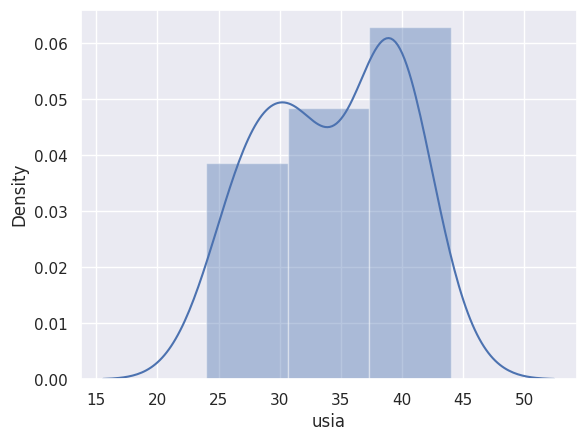

In [49]:
sns.distplot(data['usia'])

<ipython-input-33-53fe516a88e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

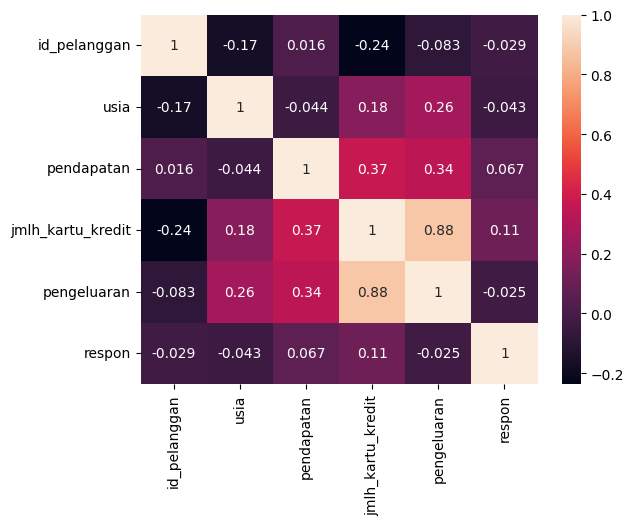

In [33]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('respon', axis=1), data['respon'], test_size=0.2)

In [61]:
model1 = LogisticRegression(random_state = 20).fit(X_train, y_train)
preds = model1.predict(X_test)
print(f'The accuracy score of Logistic Regression model is: {accuracy_score(preds, y_test)}')

The accuracy score of Logistic Regression model is: 0.42857142857142855


In [62]:
model2 = XGBClassifier().fit(X_train, y_train)
preds = model2.predict(X_test)
print(f'The accuracy score of XGBClassifier model is: {accuracy_score(preds, y_test)}')

The accuracy score of XGBClassifier model is: 0.42857142857142855
